<a href="https://colab.research.google.com/github/claredavies/DataEngAPITesting/blob/master/ParseTestsAndAnalyse/DataEngDemoWinterSchool2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes Needed

In [2]:
class TestCase:
    def __init__(self, request_type=None, request_uri=None, request_body=None, response_code=None,
                 response_time_microseconds=None):
        self.request_type = request_type
        self.request_uri = request_uri
        self.request_body = request_body
        self.response_code = response_code
        self.response_time_microseconds = response_time_microseconds

    def _set_request_type(self, request_type):
        self._request_type = request_type

    def _set_request_uri(self, request_uri):
        self._request_uri = request_uri

    def _set_request_body(self, request_body):
        self._request_body = request_body

    def _set_response_code(self, response_code):
        self._response_code = response_code

    def _set_response_time_microseconds(self, response_time_microseconds):
        self._response_time_microseconds = response_time_microseconds

In [3]:
class TestRequest:
    def __init__(self, request_type='', request_uri='', request_body='', request_time=''):
        self.request_type = request_type
        self.request_uri = request_uri
        self.request_body = request_body
        self.request_time = request_time

    def _set_request_type(self, request_type):
        self._request_type = request_type

    def _set_request_uri(self, request_uri):
        self._request_uri = request_uri

    def _set_request_body(self, request_body):
        self._request_body = request_body

    def _set_request_time(self, request_time):
        self._request_time = request_time

In [4]:
class TestResponse:
    def __init__(self, response_code='', response_time=''):
        self.response_code = response_code
        self.response_time = response_time

    def _set_response_code(self, response_code):
        self._response_code = response_code

    def _set_response_time(self, response_time):
        self._response_time = response_time

# Parsing Restler File

In [7]:
import os
from datetime import datetime
import pandas as pd

# from ParseTestsAndAnalyse.TestCase import TestCase
# from ParseTestsAndAnalyse.TestRequest import TestRequest
# from ParseTestsAndAnalyse.TestResponse import TestResponse

list_test_cases = []

# Method which extracts the request_type, request_uri, request_body & request_time (stored as TestRequest object)
def extract_sending_request_info(current_line):
    found = current_line.rstrip()
    splitted = found.split()
    time_sent = splitted[1]
    time_sent = time_sent[:-1]
    body = ''
    try:
        request_type = splitted[3]
        request_type = request_type[1:]
        request_uri = splitted[4]
        # There is a body if 'application/json\\r\\nContent-Length' is contained in the line found and contains { & }
        if 'application/json\\r\\nContent-Length' in current_line:
            found = found.replace(request_uri, '')
            first = found.find("{")
            second = current_line.rfind("}")
            if first != -1 and second != -1:
                # if here contains 'application/json\\r\\nContent-Length', { & } (has request body)
                body = found[(first - 1) + 1:second]
                # Remove un-needed \n,\r and ' from body
                body = body.replace("\\n", "")
                body = body.replace("\\r", "")
                body = body.replace("'", "")
        # Store info extracted as TestRequest Object
        current_test_request = TestRequest()
        current_test_request.request_type = request_type
        current_test_request.request_uri = request_uri
        current_test_request.request_body = body
        current_test_request.request_time = time_sent
        return current_test_request
    # Line to handle certain cases where line contains sending but not an actual request
    except IndexError:
        print("Handling invalid request:  \n")
        return None

# Method which extracts the response code and response time (stored as TestResponse object)
def extract_response_request_info(current_line):
    found = current_line.rstrip()
    splitted = found.split()
    response_code = splitted[4]
    response_time = splitted[1]
    response_time = response_time[:-1]
    current_test_response = TestResponse()
    current_test_response.response_code = response_code
    current_test_response.response_time = response_time
    return current_test_response

# Method which converts the date text to needed datetime format and then calculates time
# between when request sent and received in microseconds
def get_reponse_time_microseconds(request_time_sent, response_time_received):
    time_received = datetime.strptime(response_time_received, '%H:%M:%S.%f')
    time_sent = datetime.strptime(request_time_sent, '%H:%M:%S.%f')
    response_time = time_received - time_sent
    return response_time.microseconds

# Main function which reads in restler_output.txt file and extracts the test case (request_type, request_uri, request_body, response_code and
# response_time_microseconds)

# from google.colab import files
# uploaded = files.upload()
# data = pd.read_csv('restler_output.txt'

def main():
    # Reading in file
    abs_file_path = "restler_output.txt"

    with open(abs_file_path, "r") as fp:
        test_request = TestRequest()
        test_response = TestResponse()
        for line in fp:
            # Extracting sent part of request
            if "Sending" in line:
                test_request = extract_sending_request_info(line)
            # Extracting received part of request (following line)
            if "Received" in line:
                test_response = extract_response_request_info(line)
                # Getting time between sent and received request
                time_microsecond = get_reponse_time_microseconds(test_request.request_time, test_response.response_time)
                test_case = TestCase(test_request.request_type, test_request.request_uri, test_request.request_body,
                                     test_response.response_code, time_microsecond)
                # Adding to list of test cases
                list_test_cases.append(test_case)

    # Storing list as dataframe (easy to view info and export to CSV)
    df = pd.DataFrame([t.__dict__ for t in list_test_cases])
    print(df.head())
    # script_dir = os.path.dirname(__file__)
    rel_path = "test_cases_produced_restler.csv"
    # abs_file_path_csv = os.path.join(script_dir, rel_path)
    df.to_csv(rel_path)


if __name__ == "__main__":
    main()

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling invalid request:  

Handling inval

# Parsing Generative File

In [ ]:
import os
import pandas as pd
import requests

list_test_requests = []

rel_path_generative_model_cases = "generative_model_test_cases_produced.txt"

# opening the file in read mode
file = open(rel_path_generative_model_cases, "r")
for line in file:
    if line != "\n":
        found = line.rstrip()
        splitted = found.split()
        try:
            request_type = splitted[1]
            uri = splitted[2]
            body = ''
            first = found.find("{")
            second = line.rfind("}")
            if first != -1 and second != -1:
                body = found[(first - 1) + 1:(second+1)]
                body = body.replace(" ", "")
            test_request = TestRequest(request_type, uri, body, 0)
            # Adding to list of test cases
            list_test_requests.append(test_request)
        except IndexError:
            print("handling non-valid line")


df_test_request = pd.DataFrame([t.__dict__ for t in list_test_requests])
print(df_test_request["request_body"].head())

list_test_cases = []
uri = "http://localhost:9966"
for index, row in df_test_request.iterrows():
    api_url = uri + row['request_uri']
    request_type = row['request_type']
    response = ''
    if request_type == 'GET':
        response = requests.get(api_url,row['request_body'])
    elif request_type == 'PUT':
        response = requests.put(api_url, row['request_body'])
    elif request_type == 'POST':
        response = requests.post(api_url, row['request_body'])
    elif request_type == 'DELETE':
        response = requests.delete(api_url)
    elif request_type == 'HEAD':
        response = requests.head(api_url)
    try:
        response_code = response.status_code
        time_microseconds = response.elapsed.total_seconds()*1000000

        test_case = TestCase(request_type, row['request_uri'], row['request_body'],
                             response_code, time_microseconds)
        list_test_cases.append(test_case)
    except AttributeError:
        print(response)


df_test_cases = pd.DataFrame([t.__dict__ for t in list_test_cases])

script_dir = os.path.dirname(__file__)
rel_path = "parsed_requests_generative_model_produced.csv"
abs_file_path_csv = os.path.join(script_dir, rel_path)
df_test_cases.to_csv(abs_file_path_csv)

# Analyse Results

Total number of test cases restler:   16584
Total unique test cases restler:   440
Counts for response codes restler: 
200    15121
400      483
201      376
404      275
204      126
302      107
500       96
Name: response_code, dtype: int64
Average response time restler:  0.018758381572600097
Uniqueness % (Number of unique tests / Total tests generated) restler:  2.653159671972986
Number of tests run per second (Number of tests run / Total time) restler:  4.6066666666666665
Total number of test cases generative model:   2365
Total unique test cases generative model:   787
Counts for response codes generative model: 
400    1871
200     252
404     168
500      72
204       2
Name: response_code, dtype: int64
Average response time generative model:  0.0057467238900634245
Uniqueness % (Number of unique tests / Total tests generated) generative model:  33.276955602537


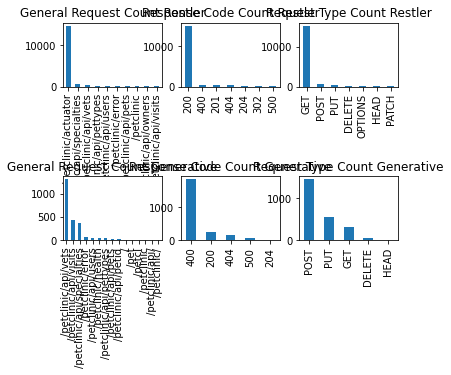

In [15]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def add_general_uri_column(test_dataframe, restAPIs):
    general_request_uri = []
    for index, row in test_dataframe.iterrows():
        found = False
        if row['request_uri'] == '/petclinic/':
            general_request_uri.append('/petclinic/')
            found = True
        if row['request_uri'] == '/petclinic':
            general_request_uri.append('/petclinic')
            found = True
        if row['request_uri'] == '/petclinic/api/':
            general_request_uri.append('/petclinic/api/')
            found = True
        if row['request_uri'] == '/':
            general_request_uri.append('/')
            found = True
        if row['request_uri'] == '/pet':
            general_request_uri.append('/pet')
            found = True
        if row['request_uri'] == '/petcl':
            general_request_uri.append('/petcl')
            found = True
        if row['request_uri'] == '/petclinic/api/special':
            general_request_uri.append('/petcl')
            found = True
        if not found:
            for uri in restAPIs:
                if uri in row['request_uri']:
                    general_request_uri.append(uri)
                    found = True
                    pass
        if found == False:
            print("row not found :" + row['request_uri'])

    test_dataframe['general_request_uri'] = general_request_uri


def main():
    # Reading in file
    abs_file_path_restler_test_cases = "test_cases_produced_restler.csv"
    abs_file_path_generative_test_cases = "parsed_requests_generative_model_produced.csv"

    df_restler_test_cases = pd.read_csv(abs_file_path_restler_test_cases)
    df_generative_test_cases = pd.read_csv(abs_file_path_generative_test_cases)

    restAPIs = ['/petclinic/actuator', '/petclinic/error', '/petclinic/api/pets', '/petclinic/api/pettypes',
                '/petclinic/api/owners', '/petclinic/api/specialties', '/petclinic/api/users', '/petclinic/api/vets',
                '/petclinic/api/visits', '/petclinic/health', '/petclinic/api/petid']

    add_general_uri_column(df_restler_test_cases, restAPIs)
    add_general_uri_column(df_generative_test_cases, restAPIs)

    # Number of request by type for each endpoint
    request_type_count_restler = df_restler_test_cases.groupby(
        ['general_request_uri', 'request_type']).size().reset_index(
        name='request_type_count')
    request_type_count_restler = pd.DataFrame(request_type_count_restler)
    request_type_count_generative = df_generative_test_cases.groupby(
        ['general_request_uri', 'request_type']).size().reset_index(
        name='request_type_count')
    request_type_count_generative = pd.DataFrame(request_type_count_generative)

    # Number of request by type for each endpoint
    response_code_count_restler = df_restler_test_cases.groupby(
        ['general_request_uri', 'response_code']).size().reset_index(
        name='response_code_count')
    response_code_count_restler = pd.DataFrame(response_code_count_restler)
    response_code_count_generative = df_generative_test_cases.groupby(
        ['general_request_uri', 'response_code']).size().reset_index(
        name='response_code_count')
    response_code_count_generative = pd.DataFrame(response_code_count_generative)

    # Need to combine into 1 table where see for each endpoint the types of requests and responses
    df_general_request_request_type_response_type_restler = pd.merge(request_type_count_restler,
                                                                     response_code_count_restler)
    rel_path_restler_test_cases = "test_cases_analysis_restler.csv"
    df_general_request_request_type_response_type_restler.to_csv(rel_path_restler_test_cases)

    df_general_request_request_type_response_type_generative = pd.merge(request_type_count_generative,
                                                                        response_code_count_generative)
    rel_path_generative_test_cases = "test_cases_analysis_generative.csv"
    df_general_request_request_type_response_type_generative.to_csv(rel_path_generative_test_cases)

    plt.subplot(3, 3, 1)
    ax1 = pd.value_counts(df_restler_test_cases['general_request_uri']).plot.bar()
    plt.subplot(3, 3, 7)
    ax4 = pd.value_counts(df_generative_test_cases['general_request_uri']).plot.bar()

    plt.subplot(3, 3, 2)
    ax2 = pd.value_counts(df_restler_test_cases['response_code']).plot.bar()
    plt.subplot(3, 3, 8)
    ax5 = pd.value_counts(df_generative_test_cases['response_code']).plot.bar()

    plt.subplot(3, 3, 3)
    ax3 = pd.value_counts(df_restler_test_cases['request_type']).plot.bar()
    plt.subplot(3, 3, 9)
    ax6 = pd.value_counts(df_generative_test_cases['request_type']).plot.bar()

    ax1.title.set_text('General Request Count Restler')
    ax4.title.set_text('General Request Count Generative')

    ax2.title.set_text('Response Code Count Restler')
    ax5.title.set_text('Response Code Count Generative')

    ax3.title.set_text('Request Type Count Restler')
    ax6.title.set_text('Request Type Count Generative')

    total_time_to_run_restler_seconds = 3600
    total_number_test_cases_restler = len(df_restler_test_cases.index)
    print("Total number of test cases restler:   " + str(total_number_test_cases_restler))
    df_restler_unique = df_restler_test_cases.drop_duplicates(subset=['request_uri', 'request_type', 'request_body'])
    total_number_unique_test_cases_restler = len(df_restler_unique.index)
    print("Total unique test cases restler:   " + str(total_number_unique_test_cases_restler))
    print("Counts for response codes restler: ")
    print(pd.value_counts(df_restler_test_cases['response_code']))
    print("Average response time restler:  " + str(
        (sum(df_restler_test_cases['response_time_microseconds']) / total_number_test_cases_restler) / 1000000))
    print("Uniqueness % (Number of unique tests / Total tests generated) restler:  " + str(
        (total_number_unique_test_cases_restler / total_number_test_cases_restler) * 100))
    print("Number of tests run per second (Number of tests run / Total time) restler:  " + str(
        total_number_test_cases_restler / total_time_to_run_restler_seconds))

    total_number_test_cases_generative_model = len(df_generative_test_cases.index)
    print("Total number of test cases generative model:   " + str(total_number_test_cases_generative_model))
    df_generative_unique = df_generative_test_cases.drop_duplicates(subset=['request_uri', 'request_type', 'request_body'])
    total_number_unique_test_cases_generative = len(df_generative_unique.index)
    print("Total unique test cases generative model:   " + str(total_number_unique_test_cases_generative))
    print("Counts for response codes generative model: ")
    print(pd.value_counts(df_generative_test_cases['response_code']))
    print("Average response time generative model:  " + str((sum(
        df_generative_test_cases['response_time_microseconds']) / total_number_test_cases_generative_model) / 1000000))
    print("Uniqueness % (Number of unique tests / Total tests generated) generative model:  " + str(
        (total_number_unique_test_cases_generative / total_number_test_cases_generative_model) * 100))

    plt.show()


if __name__ == "__main__":
    main()